In [1]:
import torch.nn as nn
from case_studies.sdf import train_sdf, get_sdf_data_loader, plot_sdf_results
from src import  GatUNet2, regular_loss, borderless_loss, clamped_loss, regular_loss

In [2]:
# data parameters

n_objects = 300
data_folder = "../sdf-prediction-graph/data2/nonuniform/mesh_from_numpy/"

batch_size = 5
edge_method = 'proximity' # or 'edge'
edge_params = {'radius': 0.25}

In [3]:
# choose model
in_channels, hidden_channels, out_channels = 3, [32, 64, 128, 64, 32], 1
model = GatUNet2(in_channels, hidden_channels, out_channels)

In [4]:
# train parameters
gamma       = 0.2
lr_0        = 0.001
n_epoch     = 750
step_size   = 250
print_every = 25
save_name   = "gat_gunet_numpy_data"

In [5]:
# loss function and parameters (see src/loss.py for more details)
loss_funcs = [borderless_loss, clamped_loss]
losses_params = {"loss_func": nn.L1Loss, "radius": 0.1, "maxv": 0.05}

# load data
train_data, test_data = get_sdf_data_loader(n_objects, data_folder, batch_size, eval_frac=0.1,
                                            edge_method=edge_method, edge_params=edge_params)

# train
train_sdf(model, train_data, test_data, loss_funcs, n_epoch=n_epoch, print_every=print_every,
          save_name=save_name, lr_0=lr_0, step_size=step_size, gamma=gamma, **losses_params)

  1%|          | 2/270 [00:00<00:18, 14.23it/s]

preparing sdf data loader


100%|██████████| 30/30 [00:01<00:00, 16.84it/s]


best gpu is 3 with 32.5 Gb available space
epoch    0: learning rate=1.00e-03, train loss: ['0.0644', '0.0334'], test loss: ['0.0327', '0.0251']
epoch   25: learning rate=1.00e-03, train loss: ['0.0064', '0.0069'], test loss: ['0.0063', '0.0069']
epoch   50: learning rate=1.00e-03, train loss: ['0.0048', '0.0054'], test loss: ['0.0049', '0.0055']
epoch   75: learning rate=1.00e-03, train loss: ['0.0040', '0.0045'], test loss: ['0.0043', '0.0049']
epoch  100: learning rate=1.00e-03, train loss: ['0.0037', '0.0042'], test loss: ['0.0037', '0.0043']
epoch  125: learning rate=1.00e-03, train loss: ['0.0036', '0.0041'], test loss: ['0.0038', '0.0043']
epoch  150: learning rate=1.00e-03, train loss: ['0.0033', '0.0038'], test loss: ['0.0033', '0.0038']
epoch  175: learning rate=1.00e-03, train loss: ['0.0033', '0.0038'], test loss: ['0.0032', '0.0038']
epoch  200: learning rate=1.00e-03, train loss: ['0.0033', '0.0038'], test loss: ['0.0034', '0.0040']
epoch  225: learning rate=1.00e-03, tra

KeyboardInterrupt: 

 20%|██        | 2/10 [00:00<00:00, 15.66it/s]

preparing sdf data loader


100%|██████████| 10/10 [00:00<00:00, 16.27it/s]
0it [00:00, ?it/s]


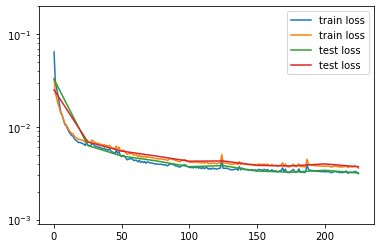

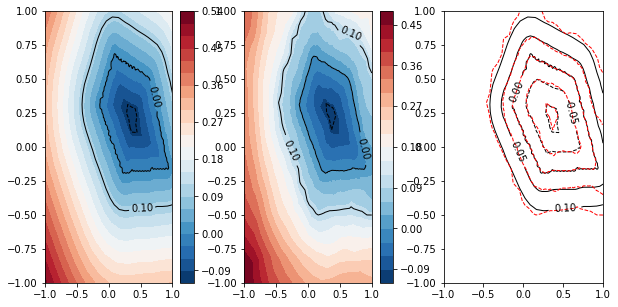

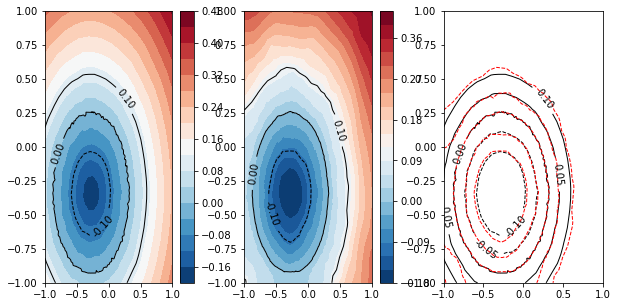

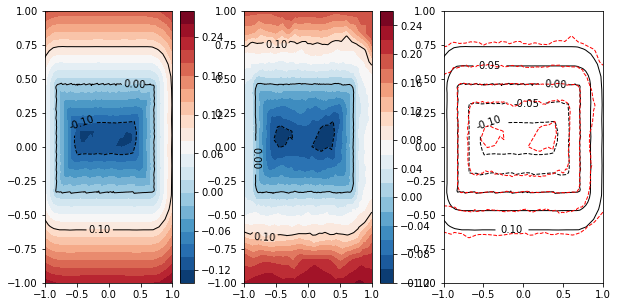

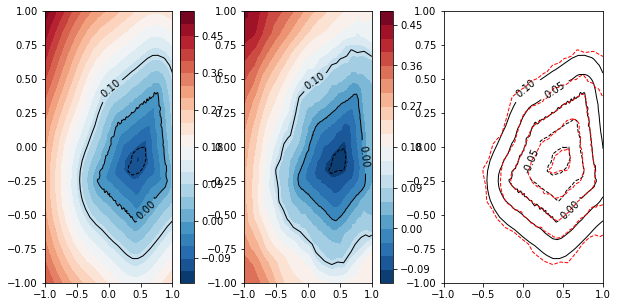

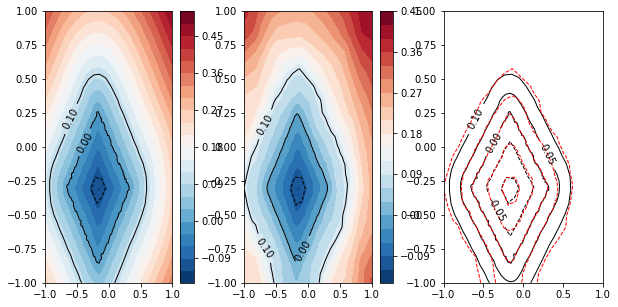

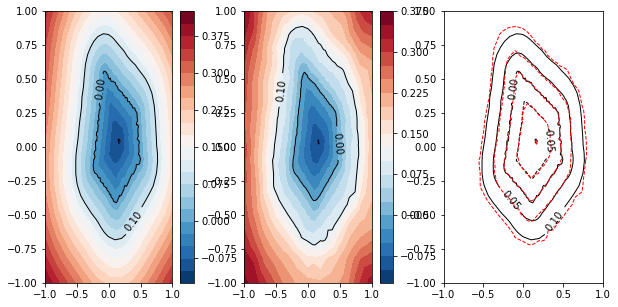

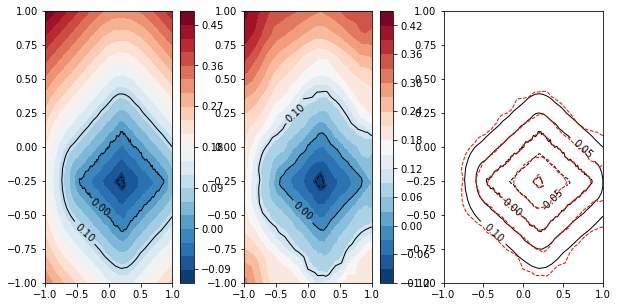

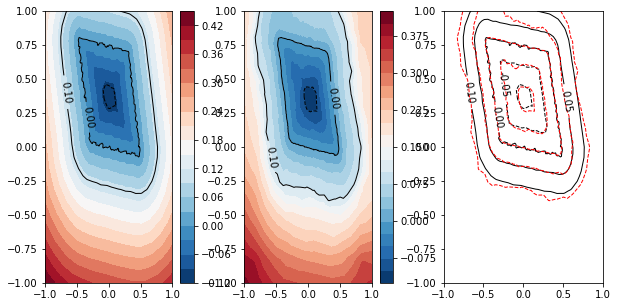

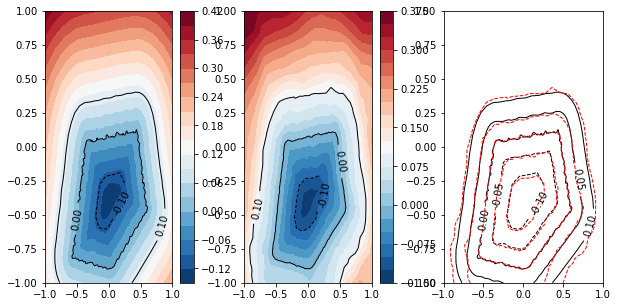

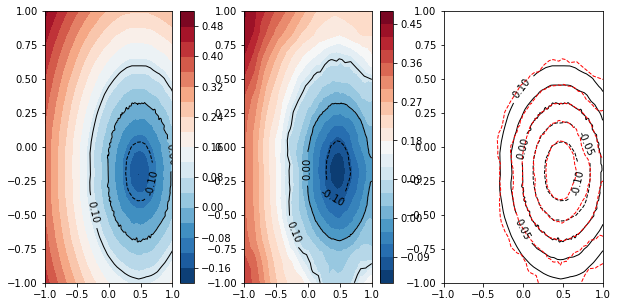

In [6]:
# visualization
data_loader, _ = get_sdf_data_loader(10, data_folder, 1, eval_frac=0, edge_method=edge_method, edge_params=edge_params)
output_func = lambda x: x.numpy()[:, 0]
plot_sdf_results(model, data_loader, save_name=save_name, output_func=output_func, levels=[-0.1, 0., 0.1])